[*********************100%***********************]  1 of 1 completed


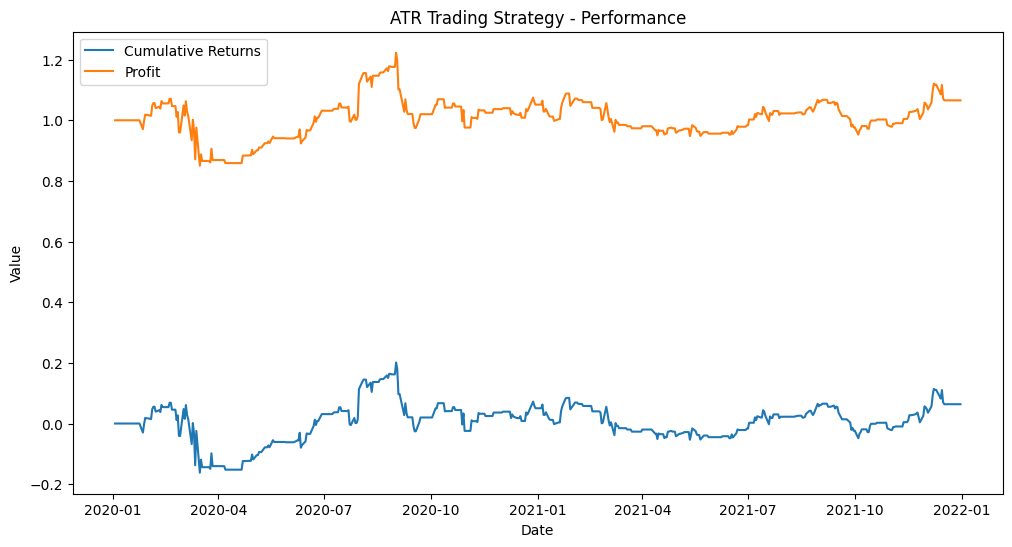

In [1]:
# Average True Range (ATR) Trading Strategy
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate Average True Range (ATR)
def calculate_atr(data, period=14):
    high = data['High']
    low = data['Low']
    close = data['Close']
    
    tr = pd.DataFrame(index=data.index)
    tr['TR1'] = high - low
    tr['TR2'] = abs(high - close.shift(1))
    tr['TR3'] = abs(low - close.shift(1))
    
    tr['TR'] = tr[['TR1', 'TR2', 'TR3']].max(axis=1)
    
    atr = tr['TR'].rolling(window=period).mean()
    return atr

# Function to implement the ATR trading strategy
def atr_trading_strategy(data, atr_period=14):
    atr = calculate_atr(data, atr_period)
    
    data['ATR'] = atr
    data['ATR_shifted'] = atr.shift(1)
    
    data['Buy_Signal'] = np.where(data['ATR'] > data['ATR_shifted'], 1, 0)
    data['Sell_Signal'] = np.where(data['ATR'] < data['ATR_shifted'], 1, 0)
    
    return data

# Fetch historical data using yfinance
symbol = 'AAPL'  # Change to your desired symbol
start_date = '2020-01-01'  # Change to your desired start date
end_date = '2022-01-01'  # Change to your desired end date

data = yf.download(symbol, start=start_date, end=end_date)

# Apply the ATR trading strategy
data = atr_trading_strategy(data)

# Calculate returns and profit
data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['Strategy_Returns'] = data['Returns'] * data['Buy_Signal'].shift(1)
data['Cumulative_Returns'] = data['Strategy_Returns'].cumsum()
data['Profit'] = data['Strategy_Returns'].cumsum().apply(np.exp)

# Plotting the cumulative returns and profit
plt.figure(figsize=(12, 6))
plt.plot(data['Cumulative_Returns'], label='Cumulative Returns')
plt.plot(data['Profit'], label='Profit')
plt.legend(loc='upper left')
plt.title('ATR Trading Strategy - Performance')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()